# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [93]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [94]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [95]:
print(f"Tiene una forma de: {df_data.shape}")
print(f"Columnas: {df_data.shape[1]}, filas: {df_data.shape[0]}")
print(f"Nombre de las columnas: {list(df_data.columns)}")
print(f"Values NaN: {df_data.isna().values.any()}")
print(f"Values duplicated: {df_data.duplicated().any()}")

Tiene una forma de: (4324, 9)
Columnas: 9, filas: 4324
Nombre de las columnas: ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']
Values NaN: True
Values duplicated: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [96]:
df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [97]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [99]:
index_of_nan = df_data[df_data['Price'].isna()].index

In [100]:
df_data.drop(index=index_of_nan, axis=0, inplace=True)

In [101]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [102]:
# Convert 'Price' column to numeric, coerce errors to NaN
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

In [103]:
# df_data.groupby('Organisation').agg({"Price":"mean"})
df_data['Price'] = df_data.groupby('Organisation')['Price'].transform(lambda x: x.fillna(x.mean()))

In [104]:

df_data[df_data["Price"].isna()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,NaN,Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,NaN,Success


In [105]:
df_data.drop(index=df_data[df_data["Price"].isna()].index, inplace=True)

In [106]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


## Descriptive Statistics

In [107]:
df_data.describe()

,Price
count,962.00
mean,134.12
std,146.98
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,450.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [108]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [109]:
number_launches_per_company = df_data.groupby('Organisation').size().reset_index(name='count')


In [110]:
number_launches_per_company

,Organisation,count
0,Arianespace,96
1,Boeing,7
2,CASC,158
3,EER,1
4,ESA,1
5,Eurockot,13
6,ExPace,1
7,ILS,13
8,ISRO,67
9,JAXA,3


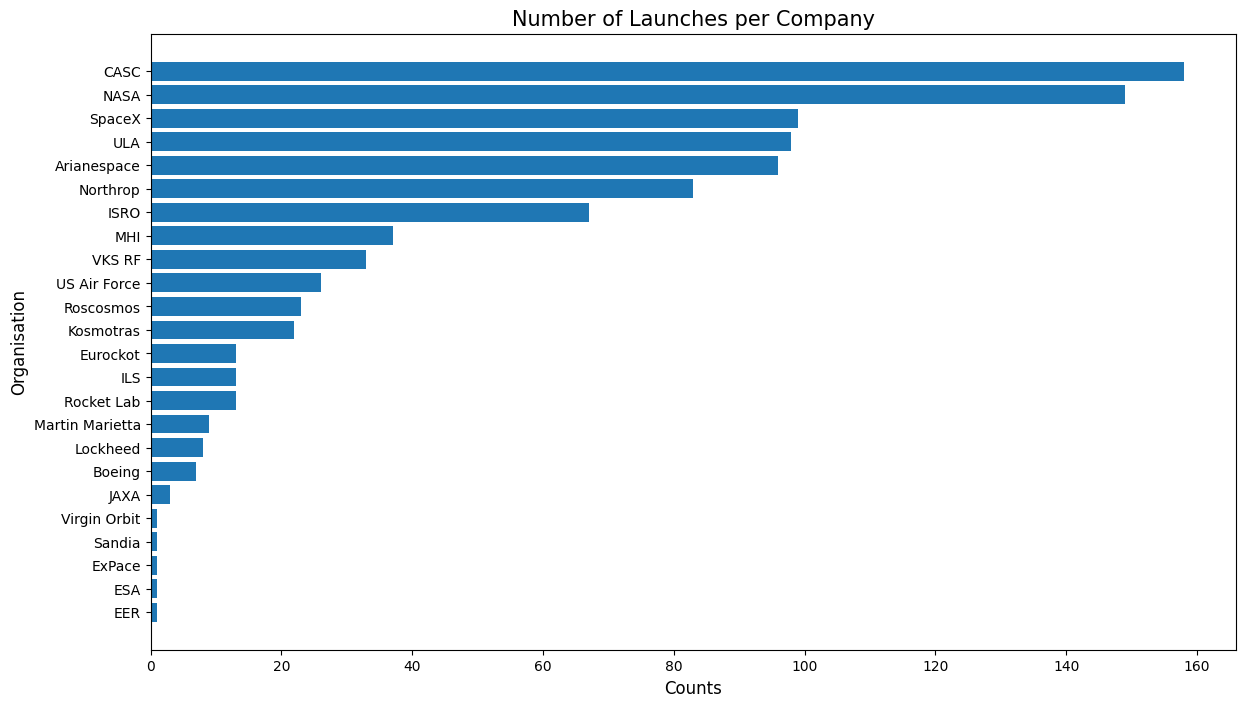

In [116]:
fig, ax = plt.subplots(figsize=(14,8))

plt.barh(data=number_launches_per_company.sort_values('count'), y='Organisation', width='count')

plt.title("Number of Launches per Company", fontsize=15)
plt.xlabel("Counts" , fontsize=12)
plt.ylabel("Organisation" , fontsize=12)

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [117]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [118]:

rockets_status = df_data.groupby('Rocket_Status').size().reset_index(name="count")

In [119]:
rockets_status

,Rocket_Status,count
0,StatusActive,586
1,StatusRetired,376


In [120]:
print(f"Hay {rockets_status['count'][0]} cohetes activos y {rockets_status['count'][1]} retirados")

Hay 586 cohetes activos y 376 retirados


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [121]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [122]:
mission_status =  df_data.groupby('Mission_Status').size().reset_index(name="count")

In [134]:
mission_status

,Mission_Status,count
0,Failure,36
1,Partial Failure,17
2,Prelaunch Failure,1
3,Success,908


In [132]:
failure = mission_status[mission_status['Mission_Status'].str.contains('Failure')]['count'].sum()
success = mission_status[mission_status['Mission_Status'] == 'Success']['count'].sum()


In [133]:
print(f"Misiones cumplidas: {success}, Misiones Fallidas: {failure}")

Misiones cumplidas: 908, Misiones Fallidas: 54


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

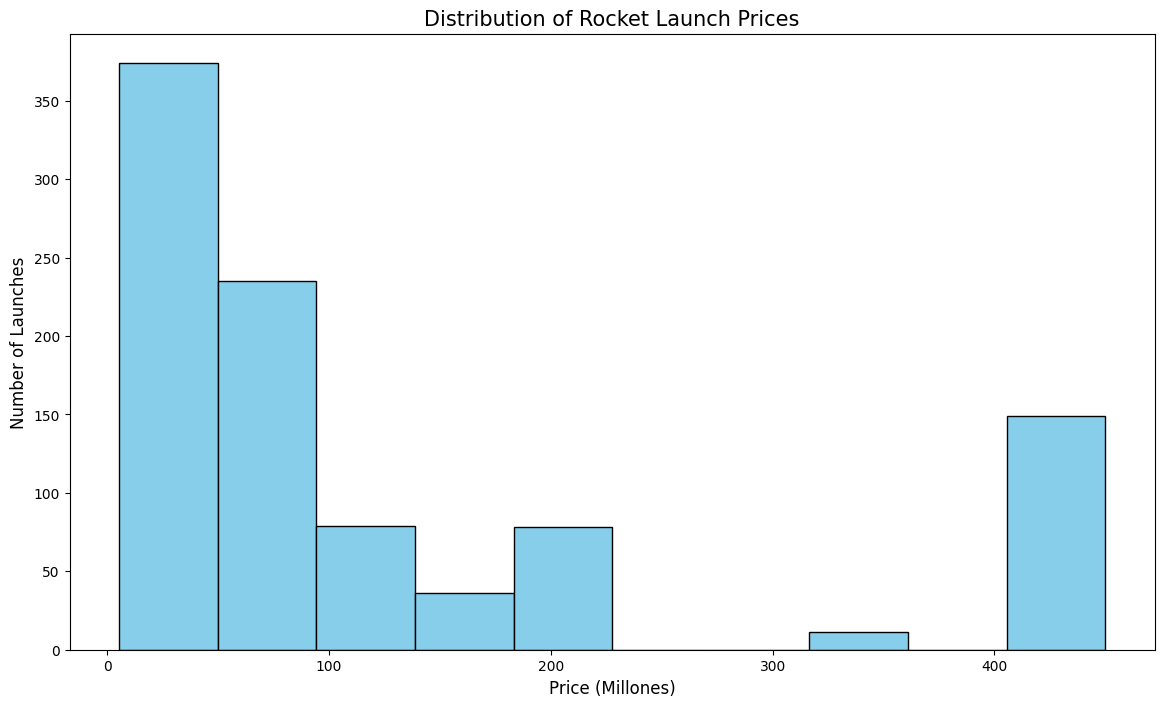

In [135]:
fig, ax = plt.subplots(figsize=(14,8))

plt.hist(data=df_data, x='Price', bins=10, color='skyblue', edgecolor='black')

plt.title("Distribution of Rocket Launch Prices", fontsize=15)
plt.xlabel("Price (Millones)" , fontsize=12)
plt.ylabel("Number of Launches" , fontsize=12)

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [136]:
df_data.shape

(962, 7)

In [138]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [154]:
%pip install --upgrade nbformat


  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
Using cached attrs-24.2.0-py3-none-any.whl (63 kB)


In [139]:
import pycountry

In [144]:
df_data_orig = df_data.copy()

In [145]:
remap_location = df_data_orig.copy()
remap_location = remap_location["Location"]

remap_data_cleaned = []

for location in remap_location:
    if "Russia" in location or "Barents Sea" in location:
        remap_data_cleaned.append("RUS")
    elif "New Mexico" in location or "Gran Canaria" in location or "Pacific Missile Range Facility" in location or "USA" in location:
        remap_data_cleaned.append("USA")
    elif "Yellow Sea" in location or "China" in location:
        remap_data_cleaned.append("CHN")
    elif "Shahrud Missile Test Site" in location:
        remap_data_cleaned.append("IRN")
    else:
        country_split = location.split(",")[-1].strip()
        remap_data_cleaned.append(country_split)

print(remap_data_cleaned[:10])




countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, country) for country in remap_data_cleaned]

# df_data["Country_ISO"] = codes
df_data_orig["Country_ISO"] = codes

df_data.head(3)

['USA', 'CHN', 'Kazakhstan', 'USA', 'CHN', 'Kazakhstan', 'USA', 'Japan', 'USA', 'CHN']


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success


In [146]:
choro_df_launches = df_data_orig.groupby(["Country_ISO"], as_index=False).agg({"Detail":pd.Series.count})
choro_df_launches.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
choro_df_launches.sort_values("Launch_Counts", ascending=False)

,Country_ISO,Launch_Counts
7,USA,490
0,CHN,159
1,FRA,95
2,IND,67
6,RUS,54
4,KAZ,44
3,JPN,40
5,NZL,13


In [156]:
import plotly.express as px

In [159]:
plt.figure(figsize=(20,10), dpi=120)

fig = px.choropleth(choro_df_launches, locations="Country_ISO", 
                    hover_name="Country_ISO",
                    color="Launch_Counts",                   
                    color_continuous_scale="sunsetdark")


fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<Figure size 2400x1200 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [160]:
df_failures = df_data_orig.copy()

cleaned_failure_col = []
for failure in df_failures["Mission_Status"]:
    if "Failure" in failure:
        cleaned_failure_col.append("Failure")
    else:
        cleaned_failure_col.append(failure)


df_failures["Mission_Status"] = cleaned_failure_col

In [161]:

choro_df_failures = df_failures.groupby(["Country_ISO","Mission_Status"], as_index=False).agg({"Detail":pd.Series.count})
choro_df_failures.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
choro_df_failures.sort_values("Launch_Counts", ascending=False).head(5)

,Country_ISO,Mission_Status,Launch_Counts
14,USA,Success,462
1,CHN,Success,152
3,FRA,Success,92
5,IND,Success,59
12,RUS,Success,51


In [162]:
import plotly.express as px

plt.figure(figsize=(20,10), dpi=120)

fig = px.choropleth(choro_df_failures[choro_df_failures["Mission_Status"] == "Failure"], locations="Country_ISO", 
                    color="Launch_Counts",                   
                    color_continuous_scale=px.colors.sequential.Plasma)


fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<Figure size 2400x1200 with 0 Axes>

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [163]:
fig = px.sunburst(df_data_orig, path=['Country_ISO', 'Organisation', 'Mission_Status'])
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [164]:

df_data.groupby("Organisation").agg({"Price":pd.Series.sum}).sort_values("Price", ascending=False)

,Price
Organisation,
NASA,"67,050.00"
Arianespace,"16,345.00"
ULA,"14,798.00"
CASC,"6,340.26"
SpaceX,"5,444.00"
Northrop,"3,930.00"
MHI,"3,532.50"
ISRO,"2,177.00"
US Air Force,"1,550.92"


# Analyse the Amount of Money Spent by Organisation per Launch

In [167]:
df_data.groupby("Organisation").agg({"Price":pd.Series.median}).sort_values("Price", ascending=False)

,Price
Organisation,
NASA,450.00
Arianespace,200.00
Boeing,164.00
ULA,123.00
ILS,109.00
MHI,90.00
US Air Force,59.00
SpaceX,56.50
Roscosmos,48.50


# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [169]:
df_data_time_cleaned = df_data_orig.copy()


date_cleaned = []
for date in df_data_time_cleaned["Date"]:
    date_cleaned.append(" ".join(date.split(" ")[1:4]).replace(",","").strip())

month_mapping = {
    "Jan": "January",
    "Feb": "February",
    "Mar": "March",
    "Apr": "April",
    "May": "May",
    "Jun": "June",
    "Jul": "July",
    "Aug": "August",
    "Sep": "September",
    "Oct": "October",
    "Nov": "November",
    "Dec": "December"
}

def map_month(date):
    parts = date.split()
    parts[0] = month_mapping.get(parts[0], parts[0])

    return "-".join(parts)

dates_full_month = list(map(map_month, date_cleaned))



df_data_time_cleaned["Date"] = dates_full_month
df_data_time_cleaned["Date"] = pd.to_datetime(df_data_time_cleaned["Date"], errors="coerce", format="%B-%d-%Y")
df_data_time_cleaned

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,Titan IIIB | KH-8,StatusRetired,59.00,Success,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [170]:
df_data_time_cleaned["Month"] = df_data_time_cleaned["Date"].dt.month
df_data_time_cleaned["Year"] = df_data_time_cleaned["Date"].dt.year
df_data_time_cleaned.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO,Month,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,8,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,8,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,7,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,7,2020
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,7,2020


In [172]:
df_data_time_cleaned.groupby("Month").size().reset_index(name='counts')

,Month,counts
0,1,66
1,2,60
2,3,77
3,4,91
4,5,85
5,6,85
6,7,77
7,8,82
8,9,88
9,10,83


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [173]:
df_data_time_cleaned.shape

(962, 10)

In [174]:
df_price_time = df_data_time_cleaned.groupby("Year").agg({"Price":"mean"}).reset_index()
df_price_time.head(2)

,Year,Price
0,1964,63.23
1,1965,63.23


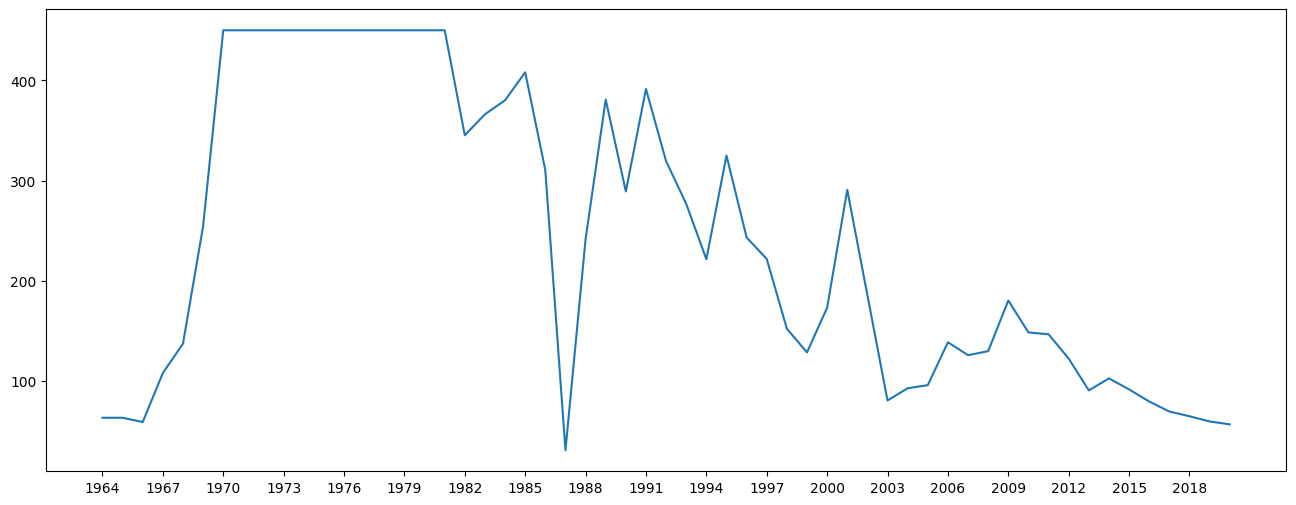

In [175]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(df_price_time["Year"],df_price_time["Price"])
plt.xticks(np.arange(df_price_time["Year"].min(), df_price_time["Year"].max(), step=3))

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [177]:
df_price_time_organisation = df_data_time_cleaned.groupby(["Year","Organisation"]).size().reset_index(name='counts')

organisation_counts = df_price_time_organisation.groupby("Organisation")["counts"].sum().reset_index()


sorted_organisations = organisation_counts.sort_values("counts", ascending=False)

top_10_organisations = sorted_organisations.head(10)

top_10_organisations

,Organisation,counts
2,CASC,158
14,NASA,149
19,SpaceX,99
20,ULA,98
0,Arianespace,96
15,Northrop,83
8,ISRO,67
12,MHI,37
22,VKS RF,33
21,US Air Force,26


In [178]:
top_10_organisations["Organisation"].to_list()

['CASC',
 'NASA',
 'SpaceX',
 'ULA',
 'Arianespace',
 'Northrop',
 'ISRO',
 'MHI',
 'VKS RF',
 'US Air Force']

In [179]:
df_plot_rdy = df_price_time_organisation[df_price_time_organisation["Organisation"].isin(top_10_organisations["Organisation"].to_list())]
df_plot_rdy

,Year,Organisation,counts
0,1964,US Air Force,2
1,1965,US Air Force,2
2,1966,US Air Force,3
3,1967,NASA,1
4,1967,US Air Force,7
...,...,...,...
258,2020,MHI,2
259,2020,Northrop,2
262,2020,SpaceX,13
263,2020,ULA,4


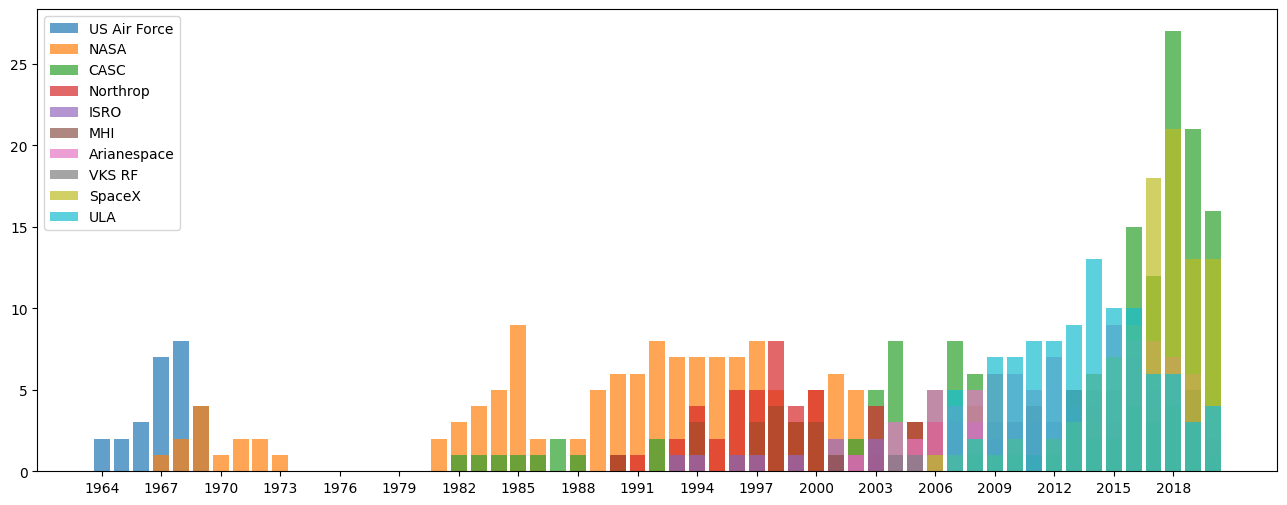

In [180]:

fig, ax = plt.subplots(figsize=(16, 6))

organizations = df_plot_rdy["Organisation"].unique()

colors = plt.cm.tab10(np.linspace(0, 1, len(organizations)))

for i, (org, color) in enumerate(zip(organizations, colors)):
    org_data = df_plot_rdy[df_plot_rdy["Organisation"] == org]
    ax.bar(org_data["Year"], org_data["counts"], color=color, label=org, alpha=0.7)

plt.xticks(np.arange(df_plot_rdy["Year"].min(), df_plot_rdy["Year"].max(), step=3))
plt.legend()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [181]:
df_data_time_cleaned.groupby("Month").size()

Month
1     66
2     60
3     77
4     91
5     85
6     85
7     77
8     82
9     88
10    83
11    76
12    92
dtype: int64

In [182]:
US_RUS = df_data_time_cleaned[(df_data_time_cleaned['Country_ISO']=='USA') | (df_data_time_cleaned['Country_ISO']=='RUS')]
US_RUS.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO,Month,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,8,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,7,2020


In [183]:
df_US_RUS = US_RUS.sort_values(["Year"])
df_US_RUS[df_US_RUS["Year"] <= 1991]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO,Month,Year
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,12,1964
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01,Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,USA,9,1964
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,5,1965
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,2,1965
3815,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-12-14,Titan IIIB | OPS 8968,StatusRetired,59.00,Success,USA,12,1966
...,...,...,...,...,...,...,...,...,...,...
1750,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05,Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,USA,6,1991
1732,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-09-12,Space Shuttle Discovery | STS-48,StatusRetired,450.00,Success,USA,9,1991
1741,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-08-02,Space Shuttle Atlantis | STS-43,StatusRetired,450.00,Success,USA,8,1991
1760,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-04-05,Space Shuttle Atlantis | STS-37,StatusRetired,450.00,Success,USA,4,1991


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [184]:
launches = df_US_RUS["Country_ISO"].value_counts().rename_axis("Country_ISO").reset_index(name='counts')
launches.head()

,Country_ISO,counts
0,USA,490
1,RUS,54


([<matplotlib.patches.Wedge at 0x21a2cb00f50>,
 [Text(1.0469445878828716, 0.3375011554095248, 'RUS'),
  Text(-1.0469445282026113, -0.3375013405404663, 'USA')])

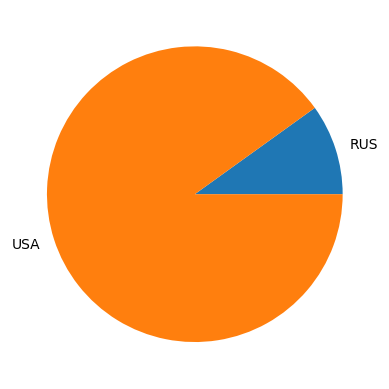

In [185]:
colors = ["#1f77b4", "#ff7f0e"]
grouping = df_US_RUS.groupby("Country_ISO").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country_ISO']

plt.pie(sizes, labels = labels, colors = colors)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [186]:
df_US_RUS_grouped = df_US_RUS.groupby(["Country_ISO","Year"]).size().reset_index(name="counts")
df_US_RUS_grouped

,Country_ISO,Year,counts
0,RUS,2000,1
1,RUS,2002,2
2,RUS,2003,2
3,RUS,2004,1
4,RUS,2005,2
...,...,...,...
64,USA,2016,21
65,USA,2017,27
66,USA,2018,29
67,USA,2019,19


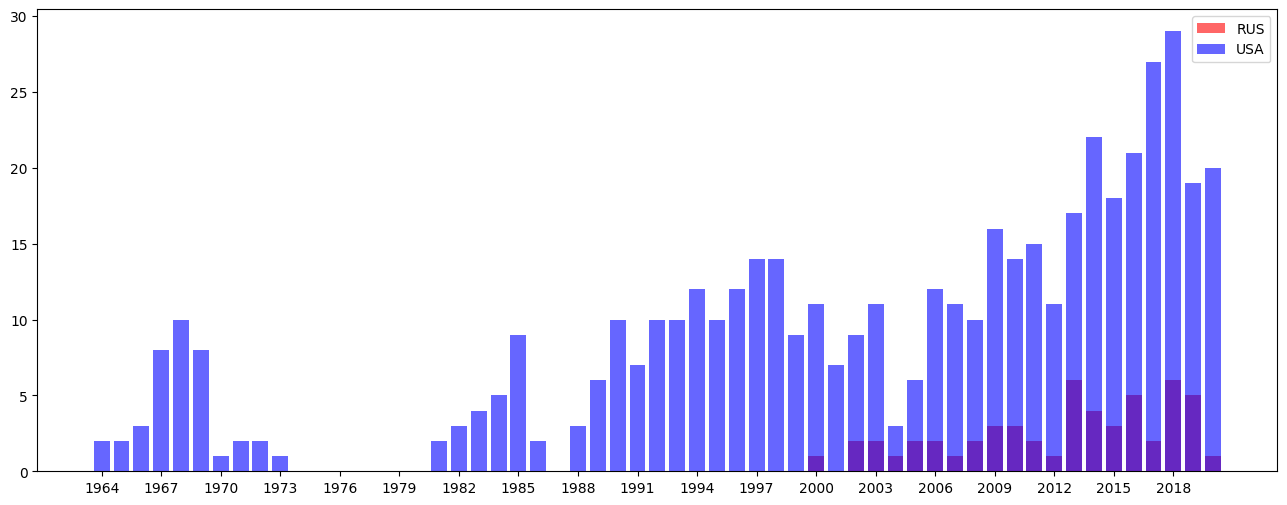

In [187]:
color_dict = {'USA': 'blue', 'RUS': 'red'} 

fig, ax = plt.subplots(figsize=(16, 6))

organizations = df_US_RUS_grouped["Country_ISO"].unique()

for org in organizations:
    org_data = df_US_RUS_grouped[df_US_RUS_grouped["Country_ISO"] == org]
    ax.bar(org_data["Year"], org_data["counts"], color=color_dict[org], label=org, alpha=0.6)
    

plt.xticks(np.arange(df_US_RUS_grouped["Year"].min(), df_US_RUS_grouped["Year"].max(), step=3))
plt.legend()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [188]:
df_data_time_cleaned_failures = df_data_time_cleaned.groupby(["Mission_Status","Year"]).size().reset_index(name="counts")
df_data_time_cleaned_failures

,Mission_Status,Year,counts
0,Failure,1964,1
1,Failure,1967,1
2,Failure,1986,1
3,Failure,1990,1
4,Failure,1993,2
...,...,...,...
85,Success,2016,61
86,Success,2017,62
87,Success,2018,87
88,Success,2019,71


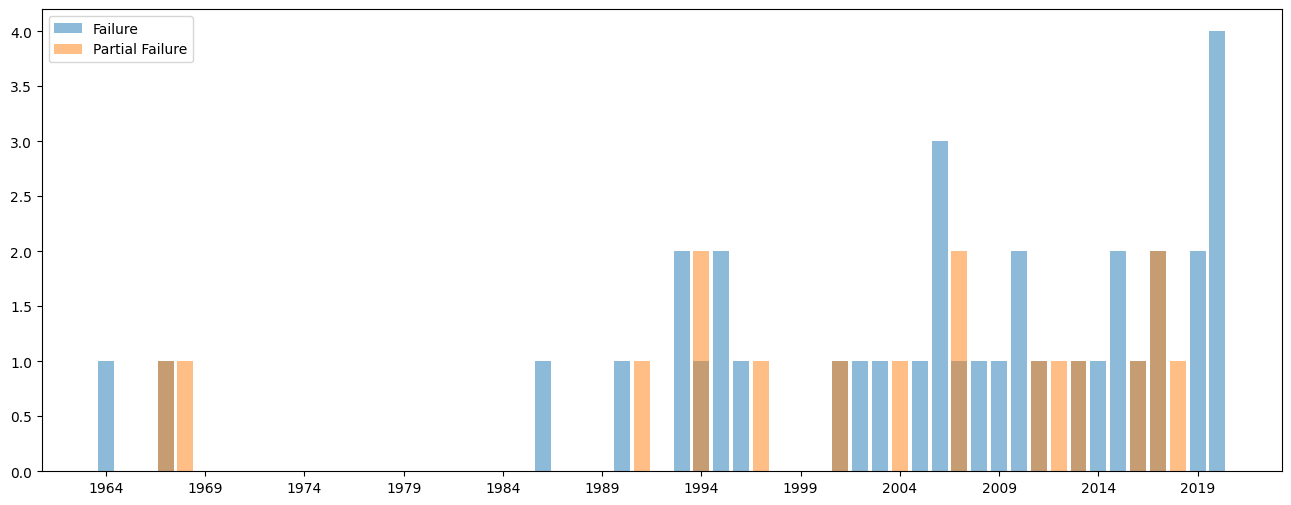

In [191]:
fig, ax = plt.subplots(figsize=(16, 6))

mission_status = df_data_time_cleaned_failures["Mission_Status"].unique()


for i, (org, color) in enumerate(zip(mission_status, colors)):
    org_data = df_data_time_cleaned_failures[df_data_time_cleaned_failures["Mission_Status"] == org]
    ax.bar(org_data["Year"], org_data["counts"], color=color, label=org, alpha=0.5)


plt.xticks(np.arange(df_data_time_cleaned_failures["Year"].min(), df_data_time_cleaned_failures["Year"].max(), step=5))
plt.legend()
plt.show()

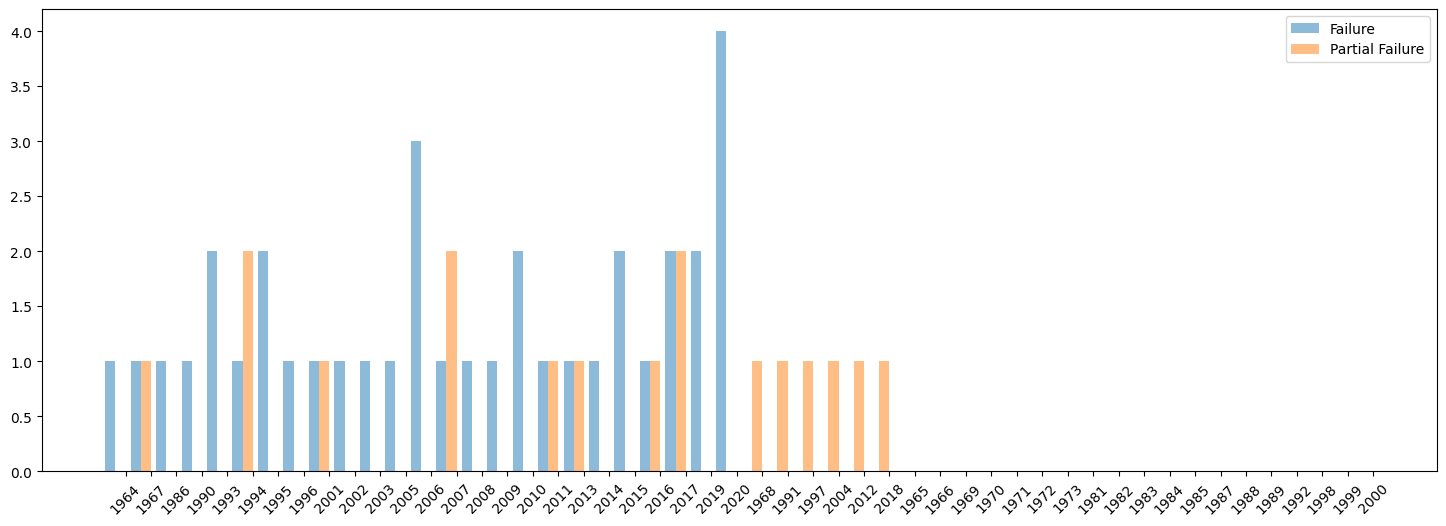

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

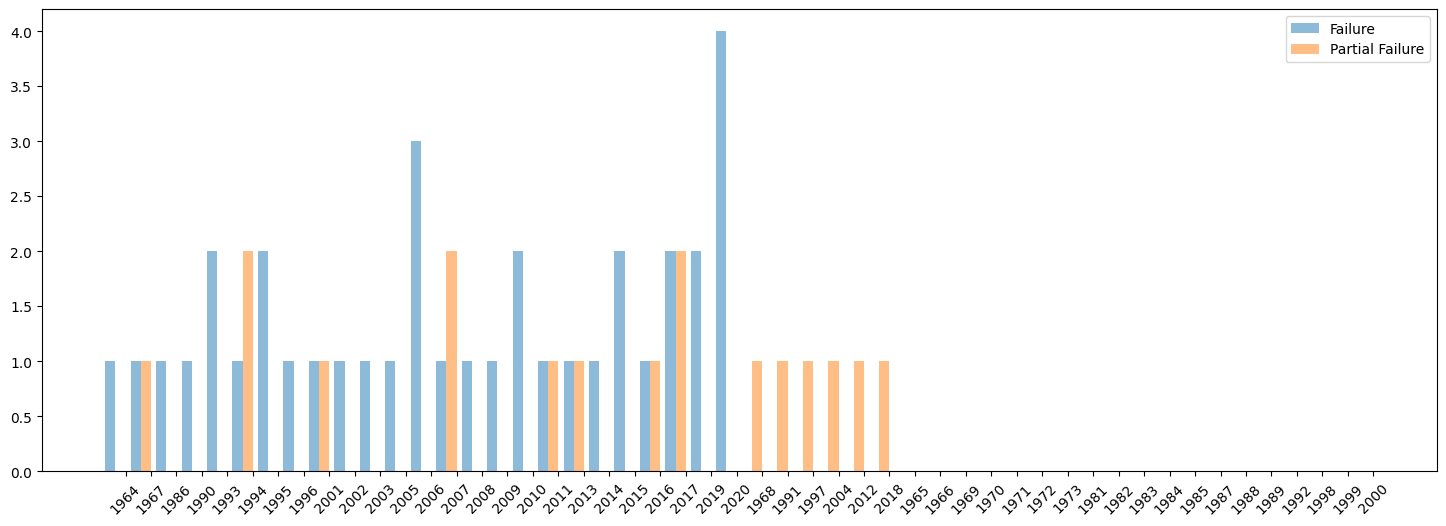

In [195]:
fig, ax = plt.subplots(figsize=(18, 6))

mission_status = df_data_time_cleaned_failures["Mission_Status"].unique()
bar_width = 0.4  

x = np.arange(len(df_data_time_cleaned_failures["Year"].unique()))

for i, (org, color) in enumerate(zip(mission_status, colors)):
    org_data = df_data_time_cleaned_failures[df_data_time_cleaned_failures["Mission_Status"] == org]
    org_data_grouped = org_data.groupby("Year").sum()["counts"]
    aligned_data = [org_data_grouped.get(year, 0) for year in df_data_time_cleaned_failures["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=color, label=org, width=bar_width, alpha=0.5)

ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_data_time_cleaned_failures["Year"].unique(), rotation=45)

plt.legend()
plt.show()

In [196]:
df_only_failures = df_data_time_cleaned_failures[df_data_time_cleaned_failures["Mission_Status"] != "Success"]
df_only_failures.head()

,Mission_Status,Year,counts
0,Failure,1964,1
1,Failure,1967,1
2,Failure,1986,1
3,Failure,1990,1
4,Failure,1993,2


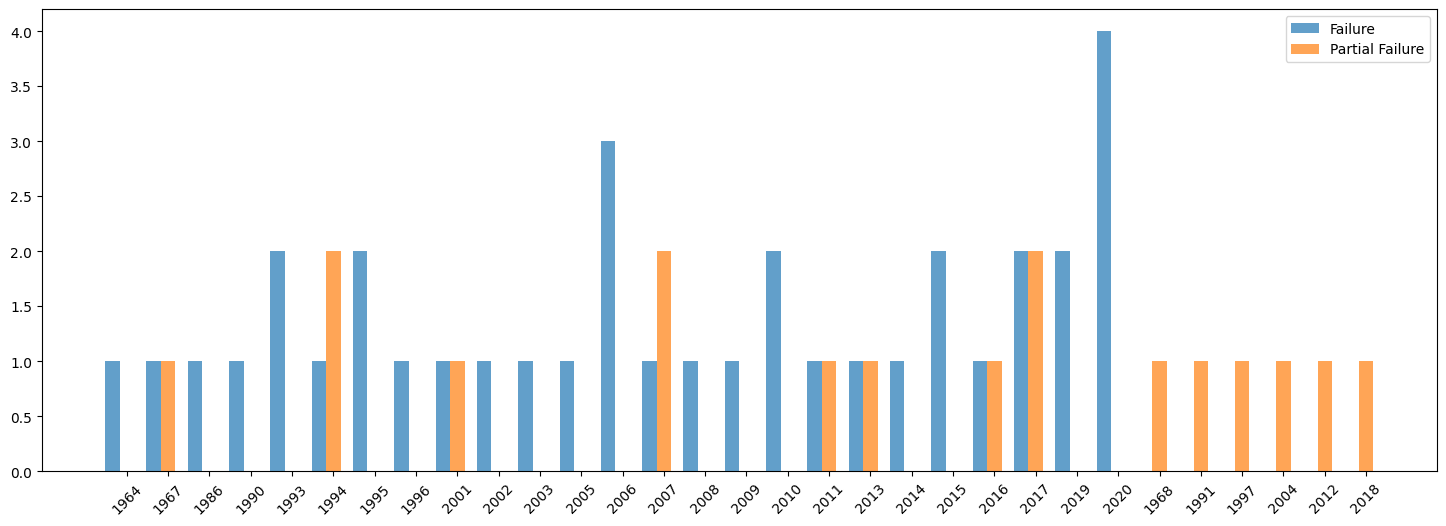

In [197]:
fig, ax = plt.subplots(figsize=(18, 6))

mission_status = df_only_failures["Mission_Status"].unique()
bar_width = 0.35  
x = np.arange(len(df_only_failures["Year"].unique()))

# Plot each group of bars
for i, (org, color) in enumerate(zip(mission_status, colors)):
    org_data = df_only_failures[df_only_failures["Mission_Status"] == org]
    org_data_grouped = org_data.groupby("Year").sum()["counts"]
    aligned_data = [org_data_grouped.get(year, 0) for year in df_only_failures["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=color, label=org, width=bar_width, alpha=0.7)

ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_only_failures["Year"].unique(), rotation=45)

plt.legend()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [198]:
df_data_time_cleaned.groupby(["Year","Country_ISO"]).size().reset_index(name="counts").sort_values("counts",ascending=False)

,Year,Country_ISO,counts
160,2018,USA,29
153,2018,CHN,27
152,2017,USA,27
131,2014,USA,22
144,2016,USA,21
...,...,...,...
119,2012,RUS,1
132,2015,CHN,1
124,2013,KAZ,1
150,2017,NZL,1


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [199]:
df_orga_1970_1980 = df_data_time_cleaned.groupby(["Year","Organisation"]).size().reset_index(name="counts").sort_values("counts",ascending=False)
df_orga_1970_1980 = df_orga_1970_1980[(df_orga_1970_1980["Year"] >= 1970) & (df_orga_1970_1980["Year"] <= 1980)].sort_values("Year",ascending=True)
df_orga_1970_1980

,Year,Organisation,counts
9,1970,NASA,1
10,1971,NASA,2
11,1972,NASA,2
12,1973,NASA,1


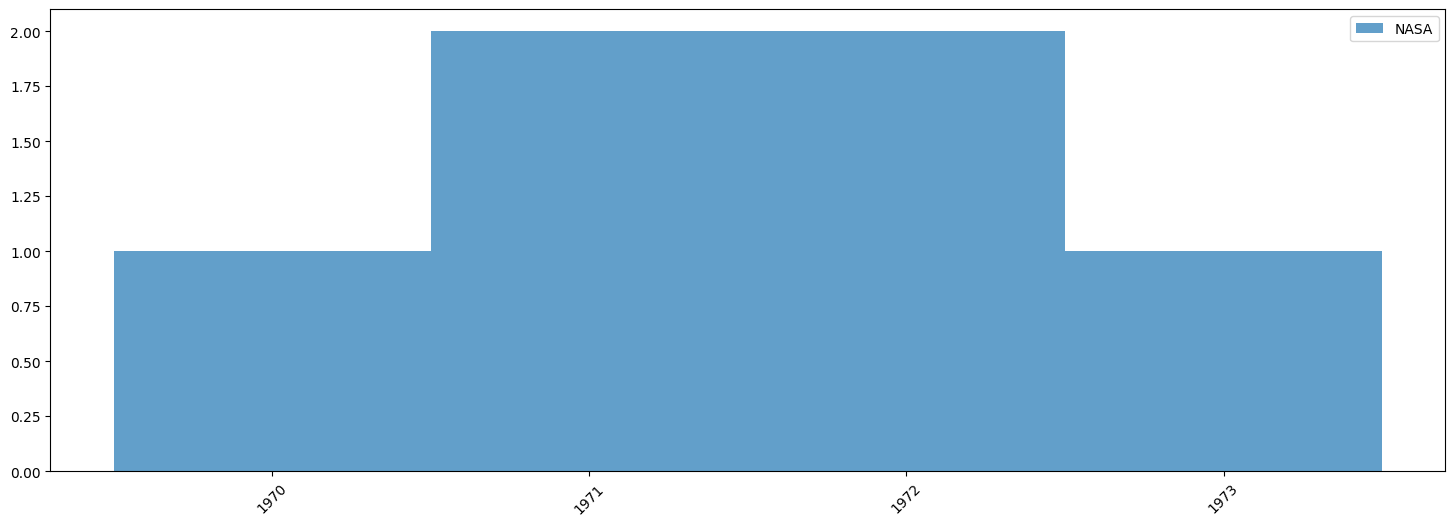

In [200]:
fig, ax = plt.subplots(figsize=(18, 6))

mission_status = df_orga_1970_1980["Organisation"].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

bar_width = 1 / len(mission_status)  

x = np.arange(len(df_orga_1970_1980["Year"].unique()))

# Plot each group of bars
for i, org in enumerate(mission_status):
    org_data = df_orga_1970_1980[df_orga_1970_1980["Organisation"] == org]
    org_data_grouped = org_data.groupby("Year").sum()["counts"]
    aligned_data = [org_data_grouped.get(year, 0) for year in df_orga_1970_1980["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=colors[i % len(colors)], label=org, width=bar_width, alpha=0.7)

ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_orga_1970_1980["Year"].unique(), rotation=45)

plt.legend()
plt.show()

In [201]:
df_orga_2018_2020 = df_data_time_cleaned.groupby(["Year","Organisation"]).size().reset_index(name="counts").sort_values("counts",ascending=False)
df_orga_2018_2020 = df_orga_2018_2020[(df_orga_2018_2020["Year"] >= 2018) & (df_orga_2018_2020["Year"] <= 2020)].sort_values("Year",ascending=True)
df_orga_2018_2020.head(5)

,Year,Organisation,counts
231,2018,CASC,27
239,2018,SpaceX,21
233,2018,ISRO,7
230,2018,Arianespace,7
241,2018,VKS RF,4


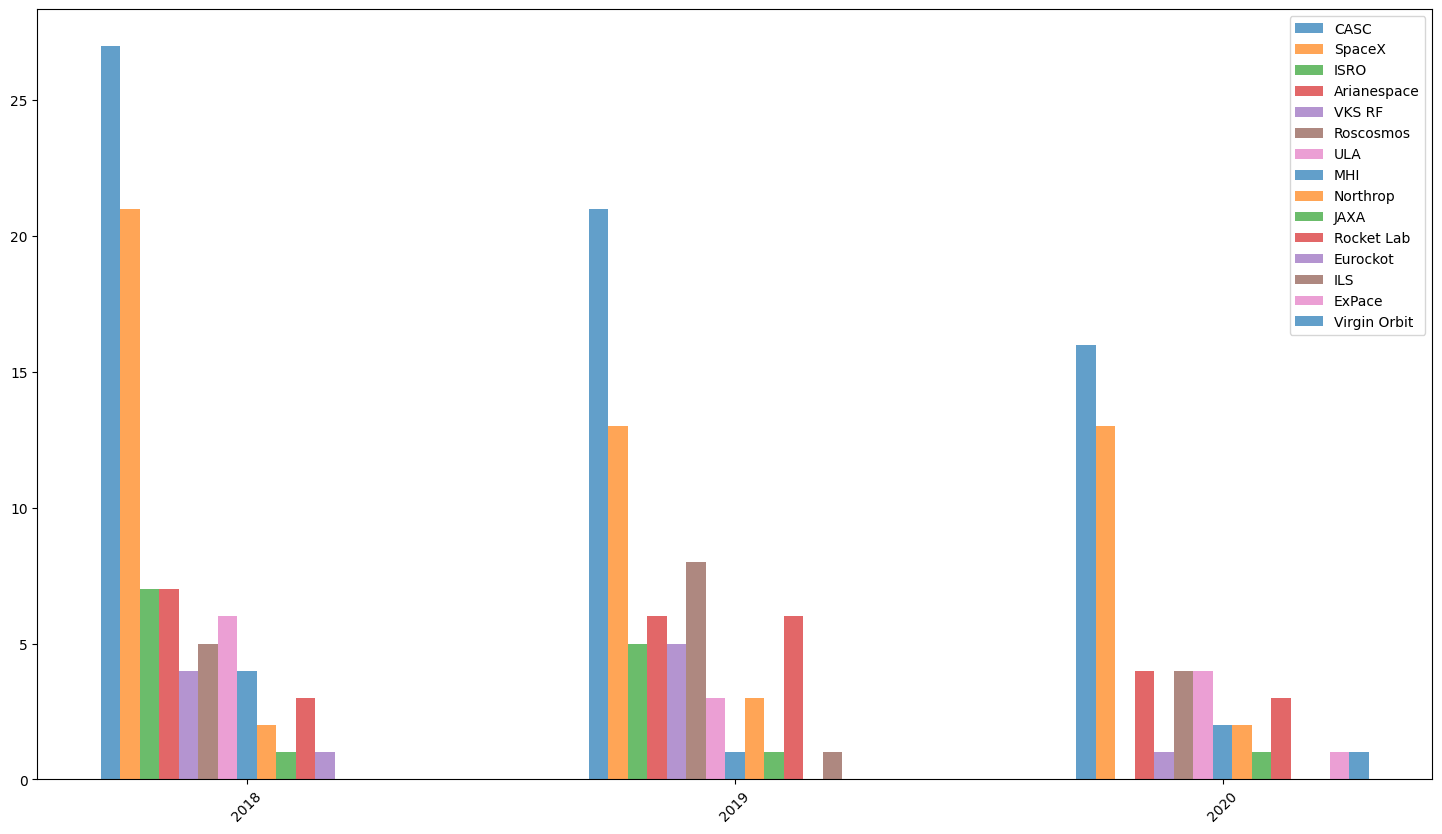

In [202]:
# Sample data and colors
mission_status = df_orga_2018_2020["Organisation"].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

fig, ax = plt.subplots(figsize=(18, 10))

bar_width = 0.6 / len(mission_status)  

x = np.arange(len(df_orga_2018_2020["Year"].unique()))

# Plot each group of bars
for i, org in enumerate(mission_status):
    org_data = df_orga_2018_2020[df_orga_2018_2020["Organisation"] == org]
    org_data_grouped = org_data.groupby("Year").sum()["counts"]

    aligned_data = [org_data_grouped.get(year, 0) for year in df_orga_2018_2020["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=colors[i % len(colors)], label=org, width=bar_width, alpha=0.7)

ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_orga_2018_2020["Year"].unique(), rotation=45)

plt.legend()
plt.show()